Import Libraries and Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [2]:
df=pd.read_csv('../data/hotel_bookings_cleaned.csv')

# Analyze Revenue Trend

Correct Arrival Date Column

In [3]:
df["arrival_date_month"] = df["arrival_date_month"].astype(str)  # Ensure it's a string
df["arrival_date"] = pd.to_datetime(
    df["arrival_date_year"].astype(str) + "-" + df["arrival_date_month"] + "-1",
    errors="coerce"  # Prevent errors if values are invalid
)


In [4]:
df["total_revenue"] = df["adr"] * (df["stays_in_week_nights"] + df["stays_in_weekend_nights"])
revenue_per_year = df.groupby([df["arrival_date"].dt.year, df["arrival_date"].dt.to_period("M")])["total_revenue"].sum()

# Convert PeriodIndex to string for JSON compatibility
monthly_revenue = {str(period): revenue for period, revenue in revenue_per_year.items()}

In [5]:
analytics_data = {"revenue_trends": monthly_revenue}
with open("../data/analytics_result.json", "w") as json_file:
    json.dump(analytics_data, json_file, indent=4)
print("Revenue trends saved to analytics_result.json!")

Revenue trends saved to analytics_result.json!


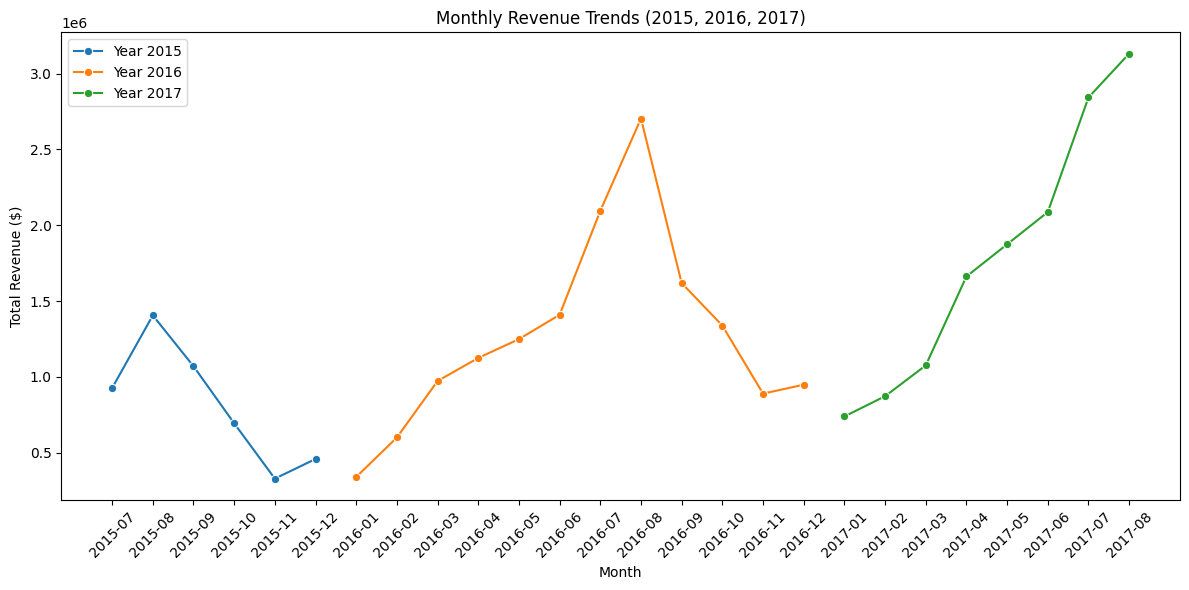

Step 1: Revenue trends visualization saved!


In [6]:
plt.figure(figsize=(12, 6))

# Separate revenue for each year
for year in [2015, 2016, 2017]:
    yearly_data = revenue_per_year.loc[year]
    sns.lineplot(x=yearly_data.index.astype(str), y=yearly_data.values, label=f"Year {year}", marker="o")

plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Total Revenue ($)")
plt.title("Monthly Revenue Trends (2015, 2016, 2017)")
plt.legend()

# Save Plot
plt.tight_layout()
plt.savefig("../visualizations/revenue_trends_yearly.png")
plt.show()
print("Step 1: Revenue trends visualization saved!")

# Cancellation Rate Analysis

In [7]:
total_bookings = len(df)
canceled_bookings = df["is_canceled"].sum()
cancellation_rate = (canceled_bookings / total_bookings) * 100  

In [8]:
with open("../data/analytics_result.json", "r") as json_file:
    analytics_data = json.load(json_file)  # Load existing data

analytics_data["cancellation_rate"] = f"{cancellation_rate:.2f}%"

with open("../data/analytics_result.json", "w") as json_file:
    json.dump(analytics_data, json_file, indent=4)

Cancellation rate (27.49%) saved to analytics_result.json!


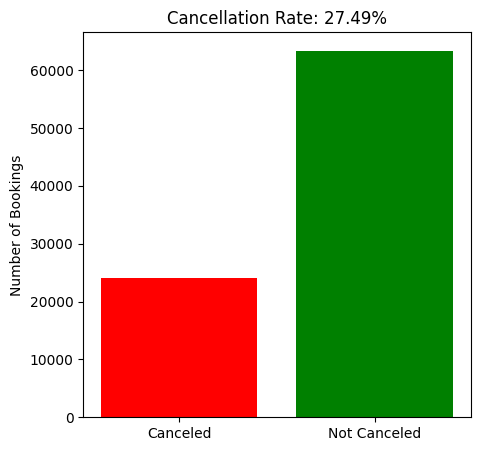

Cancellation rate visualization saved!


In [9]:
print(f"Cancellation rate ({cancellation_rate:.2f}%) saved to analytics_result.json!")

# Visualize Cancellation Rate
plt.figure(figsize=(5, 5))
plt.bar(["Canceled", "Not Canceled"], [canceled_bookings, total_bookings - canceled_bookings], color=["red", "green"])
plt.title(f"Cancellation Rate: {cancellation_rate:.2f}%")
plt.ylabel("Number of Bookings")

# Save Plot
plt.savefig("../visualizations/cancellation_rate.png")
plt.show()
print("Cancellation rate visualization saved!")

# Geographical Distribution

In [10]:
top_countries = df["country"].value_counts().head(10).to_dict()

In [11]:
with open("../data/analytics_result.json", "r") as json_file:
    analytics_data = json.load(json_file)  

analytics_data["geographical_distribution"] = top_countries

with open("../data/analytics_result.json", "w") as json_file:
    json.dump(analytics_data, json_file, indent=4)

Step 3: Geographical distribution saved to analytics_result.json!


C:\Users\Deep\AppData\Local\Temp\ipykernel_6396\2901581795.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_countries.keys()), y=list(top_countries.values()), palette="Blues_r")


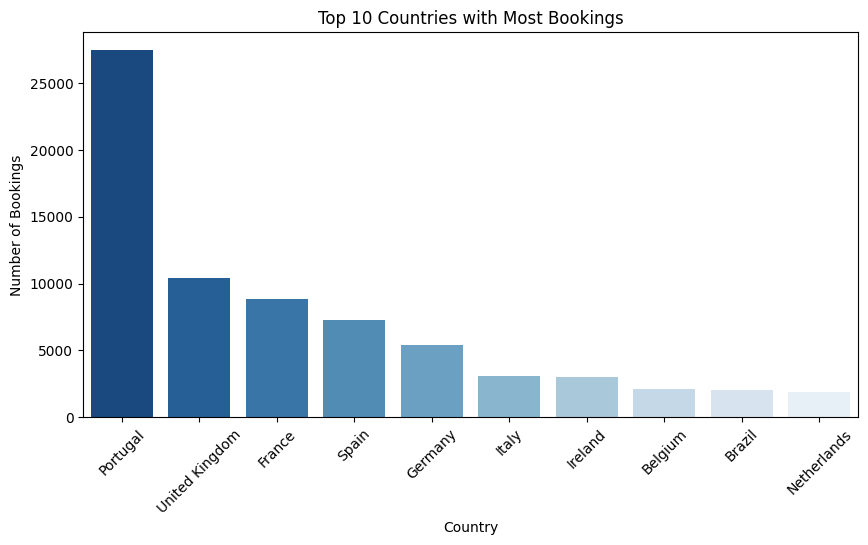

In [12]:
print("Step 3: Geographical distribution saved to analytics_result.json!")

# Visualize Geographical Distribution
plt.figure(figsize=(10, 5))
sns.barplot(x=list(top_countries.keys()), y=list(top_countries.values()), palette="Blues_r")
plt.xticks(rotation=45)
plt.xlabel("Country")
plt.ylabel("Number of Bookings")
plt.title("Top 10 Countries with Most Bookings")

# Save Plot
plt.savefig("../visualizations/geographical_distribution.png")
plt.show()

# Lead Time Analysis

In [13]:
lead_time_stats = df["lead_time"].describe().to_dict()

In [14]:
with open("../data/analytics_result.json", "r") as json_file:
    analytics_data = json.load(json_file)  

analytics_data["lead_time_distribution"] = {
    "mean": round(lead_time_stats["mean"], 2),
    "min": int(lead_time_stats["min"]),
    "max": int(lead_time_stats["max"]),
    "25th_percentile": round(lead_time_stats["25%"], 2),
    "50th_percentile (median)": round(lead_time_stats["50%"], 2),
    "75th_percentile": round(lead_time_stats["75%"], 2)
}

with open("../data/analytics_result.json", "w") as json_file:
    json.dump(analytics_data, json_file, indent=4)

print("Lead time distribution saved to analytics_result.json!")

Lead time distribution saved to analytics_result.json!


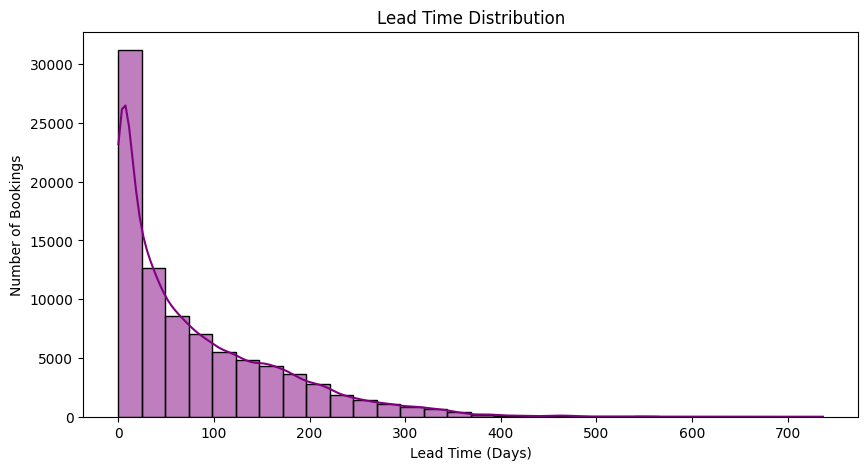

In [15]:
plt.figure(figsize=(10, 5))
sns.histplot(df["lead_time"], bins=30, kde=True, color="purple")
plt.xlabel("Lead Time (Days)")
plt.ylabel("Number of Bookings")
plt.title("Lead Time Distribution")

# Save Plot
plt.savefig("../visualizations/lead_time_distribution.png")
plt.show()

# Customer Insights

In [16]:
most_common_customer_type = df["customer_type"].mode()[0]

# Compute Average Stay Duration
df["total_nights"] = df["stays_in_week_nights"] + df["stays_in_weekend_nights"]
avg_stay_duration = df["total_nights"].mean().__round__(2)

# Compute Customer Type Distribution
customer_type_counts = df["customer_type"].value_counts().to_dict()

In [17]:
with open("../data/analytics_result.json", "r") as json_file:
    analytics_data = json.load(json_file)  

analytics_data["customer_insights"] = {
    "most_common_customer_type": most_common_customer_type,
    "avg_stay_duration": f"{avg_stay_duration} nights",
    "customer_type_distribution": customer_type_counts
}

with open("../data/analytics_result.json", "w") as json_file:
    json.dump(analytics_data, json_file, indent=4)

print("Customer insights saved to analytics_result.json!")

Customer insights saved to analytics_result.json!


C:\Users\Deep\AppData\Local\Temp\ipykernel_6396\2979138843.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(customer_type_counts.keys()), y=list(customer_type_counts.values()), palette="coolwarm")


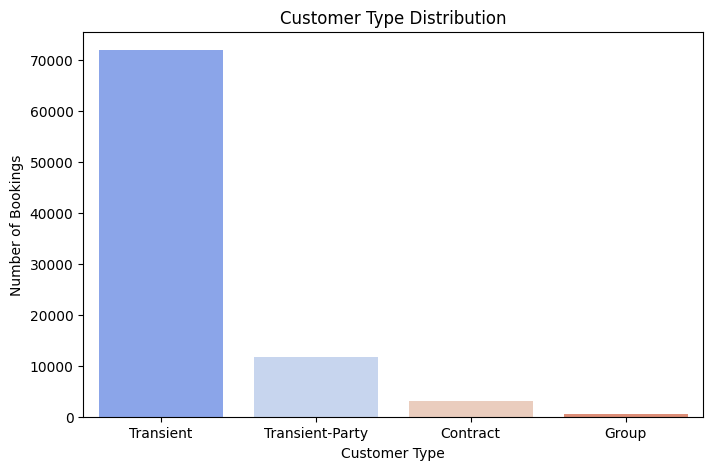

Customer type distribution visualization saved!


In [18]:
plt.figure(figsize=(8, 5))
sns.barplot(x=list(customer_type_counts.keys()), y=list(customer_type_counts.values()), palette="coolwarm")
plt.xlabel("Customer Type")
plt.ylabel("Number of Bookings")
plt.title("Customer Type Distribution")

# Save Plot
plt.savefig("../visualizations/customer_type_distribution.png")
plt.show()
print("Customer type distribution visualization saved!")

# Market Segment Analysis

In [19]:
# Compute Most Common Booking Channel
most_common_booking_channel = df["distribution_channel"].mode()[0]

# Compute Market Segment Distribution
market_segment_counts = df["market_segment"].value_counts().to_dict()


In [20]:
# Save to JSON file
with open("../data/analytics_result.json", "r") as json_file:
    analytics_data = json.load(json_file)  

analytics_data["market_segment_analysis"] = {
    "most_common_booking_channel": most_common_booking_channel,
    "market_segment_distribution": market_segment_counts
}

with open("../data/analytics_result.json", "w") as json_file:
    json.dump(analytics_data, json_file, indent=4)

print("Market segment analysis saved to analytics_result.json!")

Market segment analysis saved to analytics_result.json!


C:\Users\Deep\AppData\Local\Temp\ipykernel_6396\1591218201.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(market_segment_counts.keys()), y=list(market_segment_counts.values()), palette="viridis")


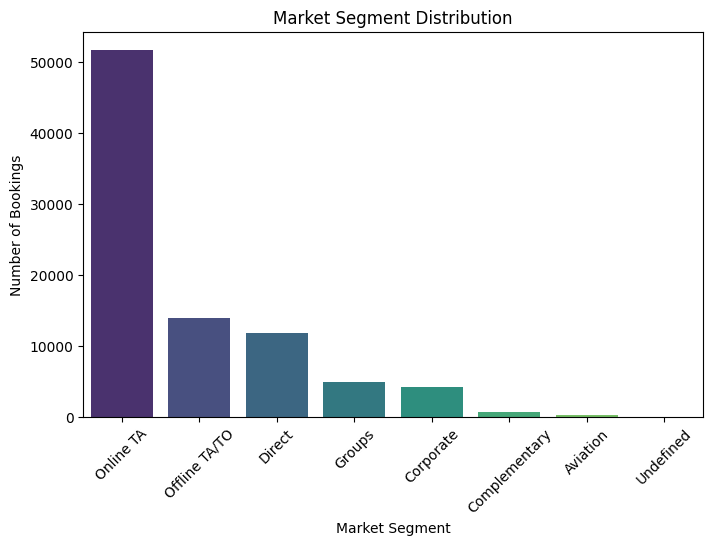

Market segment distribution visualization saved!


In [21]:
# Visualize Market Segment Distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=list(market_segment_counts.keys()), y=list(market_segment_counts.values()), palette="viridis")
plt.xlabel("Market Segment")
plt.ylabel("Number of Bookings")
plt.title("Market Segment Distribution")
plt.xticks(rotation=45)

# Save Plot
plt.savefig("../visualizations/market_segment_distribution.png")
plt.show()
print("Market segment distribution visualization saved!")

# Special Requests Analysis

In [22]:
avg_special_requests = df["total_of_special_requests"].mean().__round__(2)

# Compute Special Requests Distribution
special_requests_counts = df["total_of_special_requests"].value_counts().sort_index().to_dict()

In [23]:
# Save to JSON file
with open("../data/analytics_result.json", "r") as json_file:
    analytics_data = json.load(json_file) 

analytics_data["special_requests_analysis"] = {
    "average_special_requests": avg_special_requests,
    "special_requests_distribution": special_requests_counts
}

with open("../data/analytics_result.json", "w") as json_file:
    json.dump(analytics_data, json_file, indent=4)

print("Special requests analysis saved to analytics_result.json!")

Special requests analysis saved to analytics_result.json!


C:\Users\Deep\AppData\Local\Temp\ipykernel_6396\624851004.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(special_requests_counts.keys()), y=list(special_requests_counts.values()), palette="coolwarm")


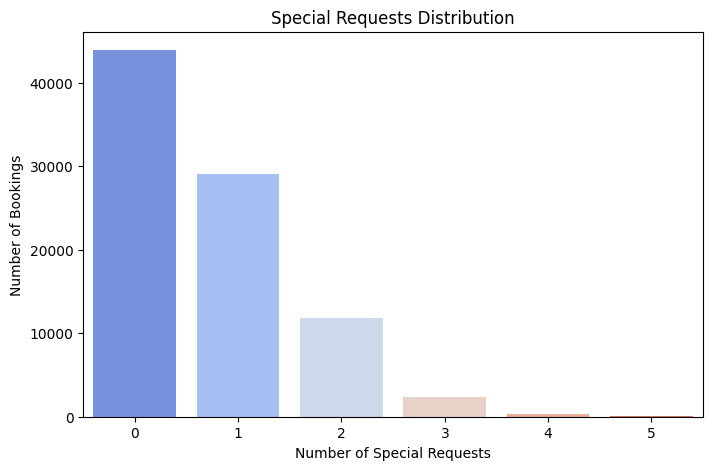

Special requests distribution visualization saved!


In [24]:
# Visualize Special Requests Distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=list(special_requests_counts.keys()), y=list(special_requests_counts.values()), palette="coolwarm")
plt.xlabel("Number of Special Requests")
plt.ylabel("Number of Bookings")
plt.title("Special Requests Distribution")

# Save Plot
plt.savefig("../visualizations/special_requests_distribution.png")
plt.show()
print("Special requests distribution visualization saved!")

In [25]:
df.to_csv("../data/hotel_bookings_final.csv", index=False)
